In [1]:
import pandas as pd

In [73]:
benificts = pd.read_csv("insights/benifict.csv")
influence = pd.read_csv("insights/influence_with_pred_diff.csv")
eccentricities =  pd.read_csv("insights/eccentricity_with_lrp_new.csv")
ecce_global_model = pd.read_csv("insights/eccentricity_with_global_model_based_3.csv")
ecce_isolated_model = pd.read_csv("insights/eccentricity_with_hessian_euclidean.csv")

In [74]:
benificts = benificts[['clients','Benefict']]

In [75]:
benificts = benificts.rename(columns={"Benefict": "benefit"})

In [76]:
benificts["Influence"] = influence.inf_val.values
benificts["Eccentricity based on parameters"] = eccentricities.average.values
benificts["Eccentricity global model"] = ecce_global_model.hess_ecc.values
benificts["Eccentricity isolated_model"] = ecce_isolated_model.hess_ecc.values
#benificts["Eccentricity Parameter"] = lrp_eccetricities.average.values

In [78]:
benificts[["benefit", "Influence","Eccentricity based on parameters","Eccentricity global model","Eccentricity isolated_model"]].corr(method='kendall')

,benefit,Influence,Eccentricity based on parameters,Eccentricity global model,Eccentricity isolated_model
benefit,1.000000,-0.221416,0.330309,-0.632727,0.363636
Influence,-0.221416,1.000000,-0.434783,0.337569,-0.141561
Eccentricity based on parameters,0.330309,-0.434783,1.000000,-0.308530,0.301271
Eccentricity global model,-0.632727,0.337569,-0.308530,1.000000,-0.225455
Eccentricity isolated_model,0.363636,-0.141561,0.301271,-0.225455,1.000000


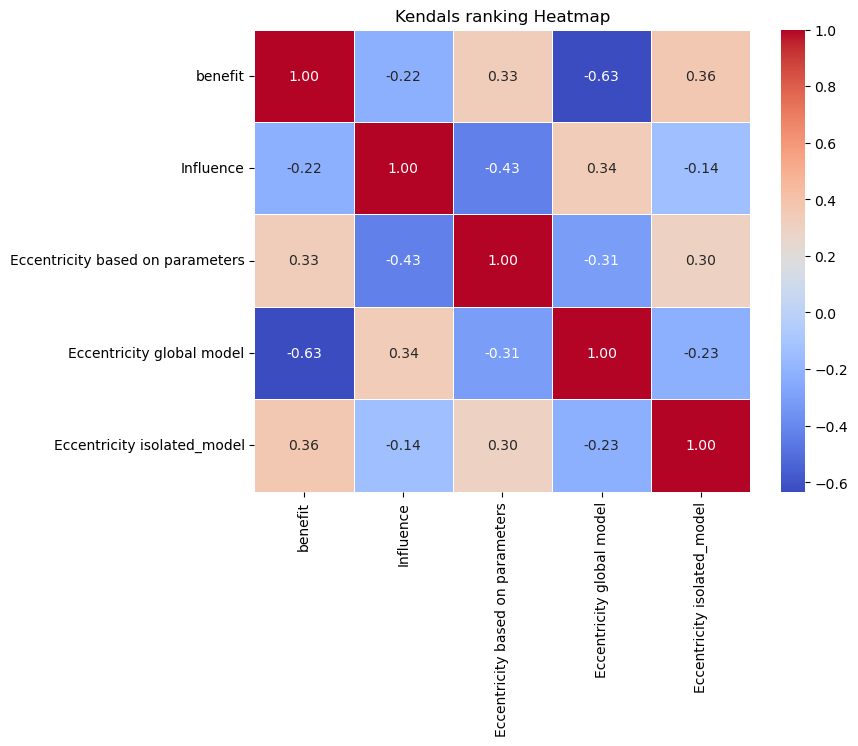

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["benefit", "Influence", "Eccentricity based on parameters", "Eccentricity global model", "Eccentricity isolated_model"]

corr = benificts[selected_columns].corr(method='kendall')

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kendals ranking Heatmap")
plt.show()

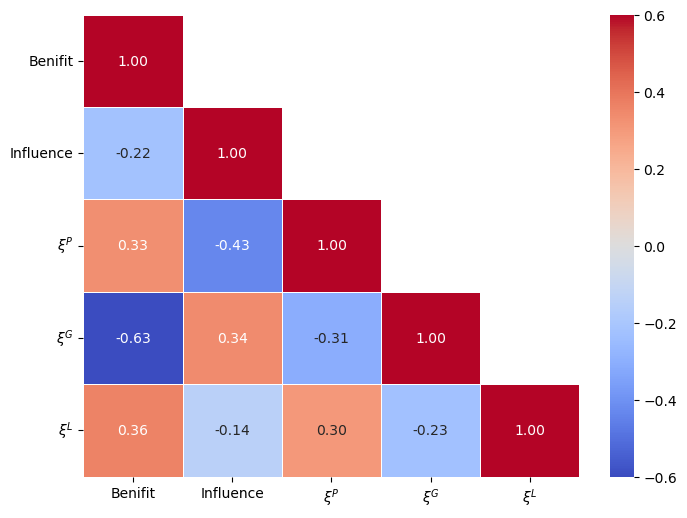

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

selected_columns = ["benefit", "Influence", "Eccentricity based on parameters", "Eccentricity global model", "Eccentricity isolated_model"]

corr = benificts[selected_columns].corr(method='kendall')

# Create a mask to display only one value for each pair of correlation
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set a consistent color bar range for both heatmaps
vmin = -0.6  # Minimum value for the color bar
vmax = 0.6   # Maximum value for the color bar

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, vmin=vmin, vmax=vmax)

latex_labels = ['Benifit', 'Influence', '$\\xi^P$', '$\\xi^G$', '$\\xi^L$']
heatmap.set_xticklabels(latex_labels, rotation=0, horizontalalignment='center')
heatmap.set_yticklabels(latex_labels, rotation=0, horizontalalignment='right')

plt.show()

In [102]:
benif_25 = pd.read_csv("insights/benefit_25.csv")
ecce_at_25 = pd.read_csv("insights/eccentricity_with_global_model_based_3_at_25_epoch.csv")
inf_25 = pd.read_csv("insights/influence_with_pred_diff_test.csv")
lrp_eccetricities_25 = pd.read_csv("insights/eccentricity_with_lrp_25_epoch.csv")
lrp_eccentricities_iso_25 = pd.read_csv("insights/eccentricity_with_isolated_model_based_3_at_25_epoch.csv")

In [103]:
benif_25 = benif_25[['clients','Benefit']]

In [106]:
benif_25["influence"] = inf_25.inf_val.values
benif_25["ecc_global"] = ecce_at_25.hess_ecc.values
benif_25["parameter ecc average"] = lrp_eccetricities_25.average.values
benif_25["ecc_iso"] = lrp_eccentricities_iso_25.hess_ecc.values

In [107]:
benif_25[["Benefit", "influence","ecc_global", "parameter ecc average","ecc_iso"]].corr(method='kendall')

,Benefit,influence,ecc_global,parameter ecc average,ecc_iso
Benefit,1.000000,-0.156080,-0.407273,0.247273,-0.182483
influence,-0.156080,1.000000,0.410164,-0.308530,0.156651
ecc_global,-0.407273,0.410164,1.000000,-0.327273,0.065694
parameter ecc average,0.247273,-0.308530,-0.327273,1.000000,0.036497
ecc_iso,-0.182483,0.156651,0.065694,0.036497,1.000000


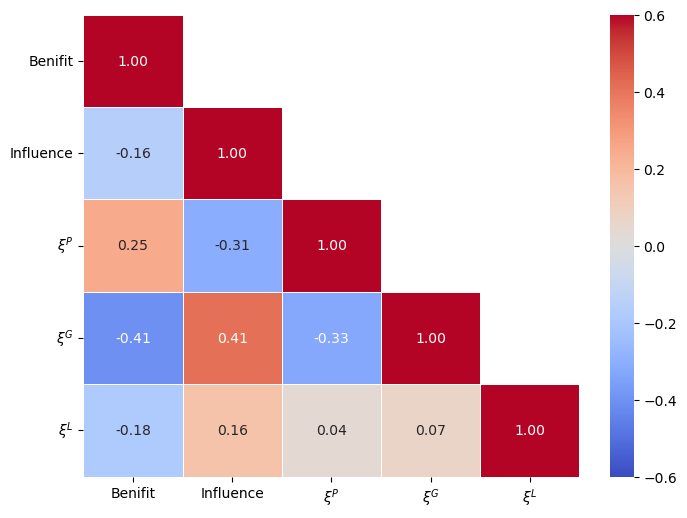

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

selected_columns = ["Benefit", "influence", "parameter ecc average", "ecc_global", "ecc_iso"]

corr = benif_25[selected_columns].corr(method='kendall')

# Create a mask to display only one value for each pair of correlation
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set a consistent color bar range for both heatmaps
vmin = -0.6  # Minimum value for the color bar
vmax = 0.6   # Maximum value for the color bar

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, vmin=vmin, vmax=vmax)

latex_labels = ['Benifit', 'Influence', '$\\xi^P$', '$\\xi^G$', '$\\xi^L$']
heatmap.set_xticklabels(latex_labels, rotation=0, horizontalalignment='center')
heatmap.set_yticklabels(latex_labels, rotation=0, horizontalalignment='right')

plt.show()
